In [1]:
import graphlab as gl
gl.canvas.set_target('ipynb') 
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vert1 = gl.SFrame.read_csv('state_vertices.csv')
vert2 = gl.SFrame.read_csv('divorce_vertices.csv')
ed = gl.SFrame.read_csv('divorce_edges.csv')


This non-commercial license of GraphLab Create for academic use is assigned to lara.burford@spsmail.cuny.edu and will expire on September 01, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\lburford\AppData\Local\Temp\graphlab_server_1475546849.log.0


Finished parsing file C:\Users\lburford\Documents\tutorials-master\tutorials-master\notebooks\state_vertices.csv

Parsing completed. Parsed 50 lines in 0.031251 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\lburford\Documents\tutorials-master\tutorials-master\notebooks\state_vertices.csv

Parsing completed. Parsed 50 lines in 0.015628 secs.

Finished parsing file C:\Users\lburford\Documents\tutorials-master\tutorials-master\notebooks\divorce_vertices.csv

Parsing completed. Parsed 9 lines in 0.015636 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\lburford\Documents\tutorials-master\tutorials-master\notebooks\divorce_vertices.csv

Parsing completed. Parsed 9 lines in 0.015622 secs.

Finished parsing file C:\Users\lburford\Documents\tutorials-master\tutorials-master\notebooks\divorce_edges.csv

Parsing completed. Parsed 100 lines in 0.03727 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\lburford\Documents\tutorials-master\tutorials-master\notebooks\divorce_edges.csv

Parsing completed. Parsed 225 lines in 0.01564 secs.

In [3]:
vert1.show()
vert2.show()
ed.show()

In [4]:
g = gl.SGraph()
g = g.add_vertices(vertices=vert1, vid_field='State')
g = g.add_vertices(vertices=vert2, vid_field='Legal_Base')
g = g.add_edges(edges=ed, src_field='Source', dst_field='Target')

In [5]:
g.get_vertices()

__id,Region
Michigan,Midwest
Maine,Northeast
Vermont,Northeast
South Carolina,South
impotence,None
Minnesota,Midwest
Wisconsin,Midwest
West Virginia,South
Tennessee,South
Nevada,West


In [6]:
g.get_edges()

__src_id,__dst_id
Maine,impotence
Maine,alcohol
South Carolina,alcohol
Maine,incompatability
Maine,desertion
Maine,insanity
Michigan,incompatability
South Carolina,desertion
Vermont,desertion
Vermont,insanity


In [7]:
g.show(vlabel='id')

In [8]:
v0 = pd.read_csv('divorce_vertices.csv')
v1 = pd.read_csv('state_vertices.csv')
e = pd.read_csv('divorce_edges.csv')

In [9]:
e.head()

,Source,Target
0,Alabama,incompatability
1,Alabama,cruelty
2,Alabama,desertion
3,Alabama,nonsupport
4,Alabama,alcohol


In [10]:
v0.head()

,Legal_Base
0,incompatability
1,cruelty
2,desertion
3,nonsupport
4,alcohol


In [11]:
v1.head()

,State,Region
0,Alabama,South
1,Alaska,West
2,Arizona,West
3,Arkansas,South
4,California,West


In [23]:
B = nx.Graph()

In [24]:
vertices0 = [zip(v0['Legal_Base'])]
for node in vertices0:
    B.add_nodes_from(node,bipartite=0)
    
vertices1 = [zip(v1['State'])]
for node in vertices1:
    B.add_nodes_from(node,bipartite=1)

In [25]:
edges = [zip(e['Source'], e['Target'])]
for edge in edges:
    B.add_edges_from(edge)

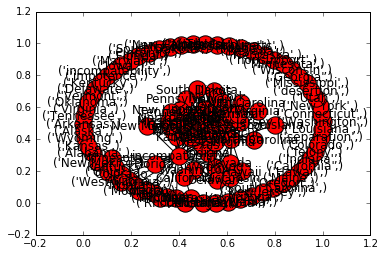

In [26]:
nx.draw_networkx(B,with_labels=True)
plt.show()

In [32]:
print("Degree Centrality:")
dc = nx.degree_centrality(B)
dc

Degree Centrality:


{'Alabama': 0.07692307692307693,
 'Alaska': 0.05982905982905984,
 'Arizona': 0.008547008547008548,
 'Arkansas': 0.06837606837606838,
 'California': 0.017094017094017096,
 'Colorado': 0.008547008547008548,
 'Connecticut': 0.06837606837606838,
 'Delaware': 0.017094017094017096,
 'Florida': 0.017094017094017096,
 'Georgia': 0.05982905982905984,
 'Hawaii': 0.017094017094017096,
 'Idaho': 0.06837606837606838,
 'Illinois': 0.042735042735042736,
 'Indiana': 0.03418803418803419,
 'Iowa': 0.008547008547008548,
 'Kansas': 0.05982905982905984,
 'Kentucky': 0.008547008547008548,
 'Louisiana': 0.017094017094017096,
 'Maine': 0.05982905982905984,
 'Maryland': 0.05128205128205129,
 'Massachusetts': 0.06837606837606838,
 'Michigan': 0.008547008547008548,
 'Minnesota': 0.008547008547008548,
 'Mississippi': 0.05982905982905984,
 'Missouri': 0.008547008547008548,
 'Montana': 0.008547008547008548,
 'Nebraska': 0.008547008547008548,
 'Nevada': 0.025641025641025644,
 'New Hampshire': 0.05982905982905984,
 '

In [33]:
print("Betweenness Centrality:")
bc = nx.betweenness_centrality(B)
bc

Betweenness Centrality:


{'Alabama': 0.004247722715745145,
 'Alaska': 0.0025179643638869875,
 'Arizona': 0.0,
 'Arkansas': 0.0015592974818199174,
 'California': 0.00026621536768449113,
 'Colorado': 0.0,
 'Connecticut': 0.003589407943739673,
 'Delaware': 0.0003981494481836842,
 'Florida': 0.00026621536768449113,
 'Georgia': 0.0025179643638869875,
 'Hawaii': 0.0003981494481836842,
 'Idaho': 0.003589407943739673,
 'Illinois': 0.0002498399121270629,
 'Indiana': 0.001134582232477981,
 'Iowa': 0.0,
 'Kansas': 0.0025179643638869875,
 'Kentucky': 0.0,
 'Louisiana': 8.362342052260034e-05,
 'Maine': 0.0025047937954161955,
 'Maryland': 0.0008766196118261632,
 'Massachusetts': 0.0035021680278393874,
 'Michigan': 0.0,
 'Minnesota': 0.0,
 'Mississippi': 0.0025179643638869875,
 'Missouri': 0.0,
 'Montana': 0.0,
 'Nebraska': 0.0,
 'Nevada': 0.0007644315273243635,
 'New Hampshire': 0.002494415572354961,
 'New Jersey': 0.0008280054039620627,
 'New Mexico': 0.0007171601866211272,
 'New York': 0.0003138203774099823,
 'North Carol

In [35]:
DC = pd.DataFrame(dc.items())
DC.columns = ['State','Degree_Centrality']

In [36]:
BC = pd.DataFrame(bc.items())
BC.columns = ['State','Betweenness_Centrality']

In [43]:
output = pd.merge(v1,DC, on='State')
output = pd.merge(output,BC,on='State')
output.groupby('Region').mean()

,Degree_Centrality,Betweenness_Centrality
Region,,
Midwest,0.030627,0.000880
Northeast,0.056030,0.002008
South,0.043803,0.001510
West,0.026956,0.000790


In [44]:
output.groupby('Region').sum()


,Degree_Centrality,Betweenness_Centrality
Region,,
Midwest,0.367521,0.010566
Northeast,0.504274,0.018073
South,0.700855,0.024167
West,0.350427,0.010266
